In [1]:
import cv2 as cv

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Set the required paths to image and ’*.pb’ and ’*.pbtxt’
img_path = '/home/jayasimha/Downloads/Dataset/1.jpg'

graph_path = "/home/jayasimha/NJ/Models/ssd_mobilenet_v2_oid_v4_2018_12_12/frozen_inference_graph.pb"
pbtxt_path = "/home/jayasimha/NJ/Models/ssd_mobilenet_v2_oid_v4_2018_12_12/graph.pbtxt"

# graph_path = "/home/jayasimha/NJ/Models/faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12/frozen_inference_graph.pb"
# pbtxt_path = "/home/jayasimha/NJ/Models/faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12/graph.pbtxt"

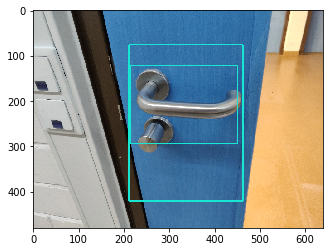

In [5]:
cvNet = cv.dnn.readNetFromTensorflow(graph_path, pbtxt_path)

img = cv.imread(img_path)
img = cv.resize(img,(640,480))

rows = img.shape[0]
cols = img.shape[1]
cvNet.setInput(cv.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
cvOut = cvNet.forward()

for detection in cvOut[0,0,:,:]:
    score = float(detection[2])
    if score > 0.3:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

plt.imshow(img)
plt.show()